# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
from sklearn.model_selection import train_test_split
# Median value of owner-occupied homes in $1000's
# in sklearn you can use this function from sklearn (train_test_splitv)
# Step 1 define features (x) and target variable (y). 

x = data.drop('MEDV', axis=1) # rest of the data (features)
y = data['MEDV'] # traget value (tryina predict)

# Step 2 split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #42 the famous value for everything 


In [8]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [9]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
# before run Linearregression IMPORT IT FIRST 
# fit the model

model = LinearRegression()
model.fit(X_train, y_train)
 
# always start with y the predictionn value

y_train_pred = model.predict(X_train)  # Predictions on training set
y_test_pred = model.predict(X_test)  # Predictions on testing set


## 3. Calculate and print R-squared for both the training and the testing set.

In [10]:
from sklearn.metrics import r2_score

#R2 for training set
r2_train = r2_score(y_train, y_train_pred)

#R2 for testing set
r2_test = r2_score(y_test, y_test_pred)

print(r2_test)
print(r2_train)

0.6687594935356329
0.7508856358979673


## 4. Calculate and print mean squared error for both the training and the testing set.

In [11]:
from sklearn.metrics import mean_squared_error

mse_true = mean_squared_error(y_train, y_train_pred) # (correct) target values

mse_pred = mean_squared_error(y_test, y_test_pred)  # Estimated target values

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

21.641412753226312
24.29111947497345


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [13]:
from sklearn.metrics import mean_absolute_error

# Mean absolute error of y train is the avarge distance
mae_true = mean_absolute_error(y_train, y_train_pred)

# Mean absolute error of y test
mae_test = mean_absolute_error(y_test, y_test_pred)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

3.3147716267832332
3.189091965887843


## Classification Model Evaluation

In [14]:
from sklearn.datasets import load_iris
data = load_iris()

In [15]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
column_names = data.feature_names

In [17]:
df = pd.DataFrame(data['data'],columns=column_names)

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
target = pd.DataFrame(data.target)

In [20]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [24]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# DataFrame 
data = pd.DataFrame(iris.data, columns=iris.feature_names)
 
data['class'] = iris.target 

#Features 
X = data.drop('class', axis=1)  

#Target variable (class of the flower)
y = data['class']  

#split the data to train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [25]:
from sklearn.linear_model import LogisticRegression

# Train LR model 
model_LR =LogisticRegression()
model_LR.fit(X_train, y_train)

# predictions
y_train_pred = model_LR.predict(X_train) 
y_test_pred = model_LR.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [26]:
from sklearn.metrics import accuracy_score

# 1 Predicting the values for training and testing sets
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

# 2 Calculate accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.975
Test Accuracy: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [28]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy for training and testing sets
train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

print(f"Train Balanced Accuracy: {train_balanced_acc:.2f}") # 2 d.p 
print(f"Test Balanced Accuracy: {test_balanced_acc:.2f}")

Train Balanced Accuracy: 0.98
Test Balanced Accuracy: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [29]:
from sklearn.metrics import precision_score
 
# weighted takes class imbalances into account
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

print(f"Train Precision Score: {train_precision:.3f}")
print(f"Test Precision Score: {test_precision:.3f}")



Train Precision Score: 0.977
Test Precision Score: 1.000


## 11. Calculate and print the recall score for both the training and the testing set.

In [30]:
from sklearn.metrics import recall_score

# recall score = ratio tp / (tp + fn)  tp num true positives and fn num false negatives.
# measures how many actual positive cases were correctly identified by the model.

train_recall = recall_score(y_train, y_train_pred, average='macro') #Calculate metrics for each label.

test_recall = recall_score(y_test, y_test_pred, average='macro')

print(f"Train Recall Score: {train_recall:.3f}")
print(f"Test Recall Score: {test_recall:.3f}")


Train Recall Score: 0.976
Test Recall Score: 1.000


## 12. Calculate and print the F1 score for both the training and the testing set.

In [31]:
from sklearn.metrics import f1_score

# F1 score 
train_f1 = f1_score(y_train, y_train_pred, average='macro') # multiclass/multilabel targets

test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Train F1 Score: {train_f1:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")

Train F1 Score: 0.975
Test F1 Score: 1.000


## 13. Generate confusion matrices for both the training and the testing set.

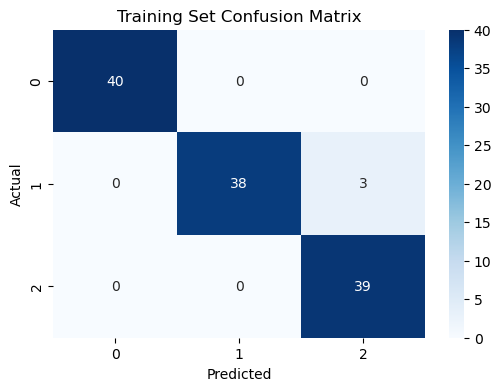

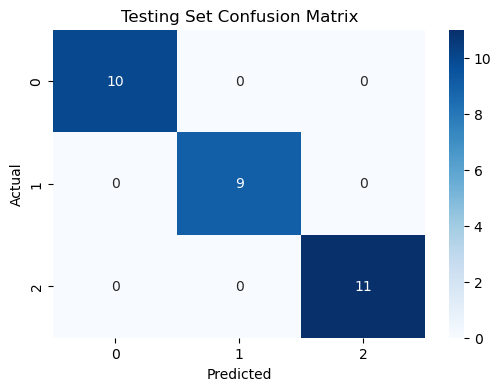

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrices is
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(6,4))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Training Set Confusion Matrix")
plt.show()

# Plot the confusion matrix for the testing set
plt.figure(figsize=(6,4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Testing Set Confusion Matrix")
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Store results
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Convert results to a DataFrame for better visualization
df_results = pd.DataFrame(results).T
print(df_results)



                        Accuracy  Precision  Recall  F1 Score
Logistic Regression          1.0        1.0     1.0       1.0
K-Nearest Neighbors          1.0        1.0     1.0       1.0
Decision Tree                1.0        1.0     1.0       1.0
Random Forest                1.0        1.0     1.0       1.0
Support Vector Machine       1.0        1.0     1.0       1.0
Naive Bayes                  1.0        1.0     1.0       1.0
